# Actividad 2: Manipulación de DataFrames con Dask
1. Carga un conjunto de datos (a elección) en formato CSV en un Dask DataFrame.
2. Realiza operaciones de manipulación de datos, como filtrado, agrupamiento y unión de DataFrames.
3. Calcula estadísticas descriptivas en columnas numéricas.

Primero que nada debemos importar la libreria de Dask **"DataFrame"**, y para visualizar **grapvhiz**, esto se hace de la siguiente manera:

In [1]:
import dask.dataframe as dd
import graphviz

Ahora podemos cargar a traves de dd, el csv con el comando _**"Dataframe.read_csv()"**_, el nombre del archivo y la separación en mi caso es con ";".

In [2]:
df = dd.read_csv('temperatura_012023.csv',sep=';')

Vemos la carga:

In [3]:
df.head()

,ID,Lugar,Posicion,ID2,Anio,Mes,Dia,Tempmin,Tempmax
0,180005,"Chacalluta, Arica Ap.",18&deg 21' 20'' S,50,2023,1,1,18.5,23.5
1,180005,"Chacalluta, Arica Ap.",18&deg 21' 20'' S,50,2023,1,2,18.2,24.0
2,180005,"Chacalluta, Arica Ap.",18&deg 21' 20'' S,50,2023,1,3,18.0,24.5
3,180005,"Chacalluta, Arica Ap.",18&deg 21' 20'' S,50,2023,1,4,18.1,25.6
4,180005,"Chacalluta, Arica Ap.",18&deg 21' 20'' S,50,2023,1,5,20.0,26.2


Vemos el grafico que nos entrega este dataframe aun que no es nada fuera de lo común.

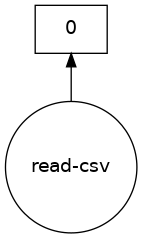

In [4]:
df.visualize(filename='dask.png')

Ahora en mi caso usare la función _**compute()**_, esto es necesario para aplicarle las operaciones.

In [5]:
df_computado = df.compute()

In [6]:
df_computado.head()

,ID,Lugar,Posicion,ID2,Anio,Mes,Dia,Tempmin,Tempmax
0,180005,"Chacalluta, Arica Ap.",18&deg 21' 20'' S,50,2023,1,1,18.5,23.5
1,180005,"Chacalluta, Arica Ap.",18&deg 21' 20'' S,50,2023,1,2,18.2,24.0
2,180005,"Chacalluta, Arica Ap.",18&deg 21' 20'' S,50,2023,1,3,18.0,24.5
3,180005,"Chacalluta, Arica Ap.",18&deg 21' 20'' S,50,2023,1,4,18.1,25.6
4,180005,"Chacalluta, Arica Ap.",18&deg 21' 20'' S,50,2023,1,5,20.0,26.2


Comprobamos el **promedio** de la temperatura minima, esto se hace a traves del comando **_"mean()"_**

df_computado.Tempmin.mean()

Realizamos el **filtro** buscando en este caso el lugar "El Loa, Calama Ad". y mostramos con head.

In [7]:
df_computado[df_computado.Lugar == 'El Loa, Calama Ad.'].head()

,ID,Lugar,Posicion,ID2,Anio,Mes,Dia,Tempmin,Tempmax
62,220002,"El Loa, Calama Ad.",22&deg 29' 53'' S,2321,2023,1,1,4.7,23.9
63,220002,"El Loa, Calama Ad.",22&deg 29' 53'' S,2321,2023,1,2,3.8,23.0
64,220002,"El Loa, Calama Ad.",22&deg 29' 53'' S,2321,2023,1,3,5.1,23.7
65,220002,"El Loa, Calama Ad.",22&deg 29' 53'' S,2321,2023,1,4,6.3,23.6
66,220002,"El Loa, Calama Ad.",22&deg 29' 53'' S,2321,2023,1,5,6.5,22.0


Agrupamos a traves de **_groupby()_** "ID", "Lugar","Posicion","ID2","Anio","Mes" y lo demas lo dejamos para que calcule el promedio (el día se promedia tambien)

In [8]:
agrupado = df_computado.groupby(["ID", "Lugar","Posicion","ID2","Anio","Mes"]).mean()

In [9]:
agrupado.head()

,,,,,,Dia,Tempmin,Tempmax
ID,Lugar,Posicion,ID2,Anio,Mes,,,
180005,"Chacalluta, Arica Ap.",18&deg 21' 20'' S,50,2023,1,16.0,18.900000,25.235484
200006,Diego Aracena Iquique Ap.,20&deg 32' 57'' S,48,2023,1,16.0,18.416129,25.429032
220002,"El Loa, Calama Ad.",22&deg 29' 53'' S,2321,2023,1,16.0,6.138710,24.312903
230001,Cerro Moreno Antofagasta Ap.,23&deg 27' 13'' S,112,2023,1,16.0,17.025806,22.503226
270001,Mataveri Isla de Pascua Ap.,27&deg 9' 32'' S,44,2023,1,16.0,20.103226,27.503226


Para la siguiente parte, necesitamos leer **otro csv**. Por lo cual realizamos las mismas opereaciones ya mencionadas con anterioridad.

In [10]:
otro = dd.read_csv('precipitacion_012023.csv',sep=';')

In [11]:
otro_computado = otro.compute()

In [12]:
otro_computado.head()

,ID,Lugar,Posicion,ID2,Anio,Mes,Dia,precipitaciones
0,180005,"Chacalluta, Arica Ap.",18&deg 21' 20'' S,50,2023,1,1,0.0
1,180005,"Chacalluta, Arica Ap.",18&deg 21' 20'' S,50,2023,1,2,0.0
2,180005,"Chacalluta, Arica Ap.",18&deg 21' 20'' S,50,2023,1,3,0.0
3,180005,"Chacalluta, Arica Ap.",18&deg 21' 20'' S,50,2023,1,4,0.0
4,180005,"Chacalluta, Arica Ap.",18&deg 21' 20'' S,50,2023,1,5,0.0


Utilizamos un _**Dataframe.merge()**_, similar como en sql, para poder hacer un inner join on las columnas comunes y que nos dejen las tempmin, tempmax y precipitaciones aparte

In [13]:
df_unido = df_computado.merge(otro_computado,on=["ID","Lugar","Posicion","ID2","Anio","Mes","Dia"])

In [14]:
df_unido.head()

,ID,Lugar,Posicion,ID2,Anio,Mes,Dia,Tempmin,Tempmax,precipitaciones
0,180005,"Chacalluta, Arica Ap.",18&deg 21' 20'' S,50,2023,1,1,18.5,23.5,0.0
1,180005,"Chacalluta, Arica Ap.",18&deg 21' 20'' S,50,2023,1,2,18.2,24.0,0.0
2,180005,"Chacalluta, Arica Ap.",18&deg 21' 20'' S,50,2023,1,3,18.0,24.5,0.0
3,180005,"Chacalluta, Arica Ap.",18&deg 21' 20'' S,50,2023,1,4,18.1,25.6,0.0
4,180005,"Chacalluta, Arica Ap.",18&deg 21' 20'' S,50,2023,1,5,20.0,26.2,0.0


Para obtener la mediana utilizamos **_median()_**.

In [19]:
df_unido.Tempmin.median()

11.4

Para obtener la desviacion standar **_std()_**

In [16]:
df_unido.Tempmax.std()

6.223299171930014

Para sacar la moda _**mode()**_

In [17]:
df_unido.precipitaciones.mode()

0    0.0
Name: precipitaciones, dtype: float64